In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Data Preprocessing

In [2]:
#Path of Files
path = r'D:/Work_ML/Mappings_Data/Train/'

In [4]:
#text = ""

#for line in f:
#    if line.strip()=="":continue
#    else:
#        text+=" "+line.strip()  
#print(text)
#f.close()

In [5]:
files = os.listdir(path)

In [6]:
#files

In [7]:
#Dataset Preparation 
target = []
script_text = []

for file in files:
    if '.robot' not in file: continue
    f = open(path+file,encoding='latin-1')
    script_text.append("".join([line.strip() for line in
                                f if line.strip()!=""]))
    if 'coverage' in file:
        target.append('Coverage')
    elif 'opti' in file:
        target.append('Optimization')
    elif 'prediction' in file:
        target.append('Prediction')
        

In [68]:
data=pd.DataFrame({'target':target,'script_text':script_text})

In [69]:
data

,target,script_text
0,Coverage,*** Settings ***Library SeleniumLibr...
1,Coverage,*** Settings ***Library SeleniumLibr...
2,Coverage,*** Settings ***Library SeleniumLibr...
3,Coverage,*** Settings ***Library SeleniumLibr...
4,Coverage,*** Settings ***Library SeleniumLibr...
5,Coverage,*** Settings ***Library SeleniumLibr...
6,Coverage,*** Settings ***Library SeleniumLibr...
7,Optimization,*** Settings ***Library SeleniumLibr...
8,Optimization,*** Settings ***Library SeleniumLibr...
9,Optimization,*** Settings ***Library SeleniumLibr...


In [10]:
#Splitting the data into Test and Train
train,test = train_test_split(data,test_size=0.3,random_state=2)

In [12]:
#restting the index
train.reset_index(drop= True,inplace=True)

In [13]:
train

,target,script_text
0,Prediction,*** Settings ***Library SeleniumLibr...
1,Prediction,*** Settings ***Library Selenium2Lib...
2,Prediction,*** Settings ***Library SeleniumLibr...
3,Optimization,*** Settings ***Library SeleniumLibr...
4,Coverage,*** Settings ***Library SeleniumLibr...
5,Coverage,*** Settings ***Library SeleniumLibr...
6,Coverage,*** Settings ***Library SeleniumLibr...
7,Prediction,*** Settings ***Library SeleniumLibr...
8,Coverage,*** Settings ***Library SeleniumLibr...
9,Prediction,*** Settings ***Library SeleniumLibr...


In [74]:
#Label encoding y_train and y_test
y_train = le.fit_transform(train['target'])
y_test = le.transform(test['target'])

In [34]:
#Coverage = 0, Optimization = 1,Prediction =2
y_train

array([2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2,
       1, 1])

In [17]:
#Coverage = 0, Optimization = 1,Prediction =2
y_test

array([1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1])

In [18]:
#Importing NLTK Libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
my_stop = set(stopwords.words('english')+list(punctuation))

In [19]:
#Analyzer
def split_into_lemmas(message):
    message = message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words:
        if word in my_stop: continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]  

In [20]:
tfidf= TfidfVectorizer(analyzer=split_into_lemmas,min_df=1,max_df=100,
                       stop_words=my_stop)

In [21]:
train_tf = tfidf.fit_transform(train['script_text'])

In [22]:
train_tf.toarray()

array([[0.49203192, 0.        , 0.0246016 , ..., 0.0277465 , 0.24601596,
        0.        ],
       [0.43892635, 0.        , 0.0243848 , ..., 0.02750199, 0.21946317,
        0.08597418],
       [0.49087985, 0.        , 0.02454399, ..., 0.02768153, 0.24543992,
        0.        ],
       ...,
       [0.49087985, 0.        , 0.02454399, ..., 0.02768153, 0.24543992,
        0.        ],
       [0.27816101, 0.        , 0.04636017, ..., 0.        , 0.18544067,
        0.        ],
       [0.46939415, 0.        , 0.02933713, ..., 0.0330874 , 0.23469708,
        0.        ]])

In [23]:
#arranging features in table format
x_train_tf = pd.DataFrame(train_tf.toarray(), 
                   columns=tfidf.get_feature_names())

test_tf=tfidf.transform(test['script_text'])
x_test_tf=pd.DataFrame(test_tf.toarray(),
                       columns=tfidf.get_feature_names())

In [24]:
x_train_tf

,'','base,***,***coverage2,***coverage3,***library,***prediction10open,***prediction11open,***prediction12open,***prediction13open,...,text,trend,upload,uploadbtn,usecases,window.scrollto,windowclick,windowset,xpath,year
0,0.492032,0.000000,0.024602,0.000000,0.00000,0.024602,0.000000,0.000000,0.000000,0.000000,...,0.024602,0.000000,0.000000,0.000000,0.000000,0.098406,0.000000,0.027747,0.246016,0.000000
1,0.438926,0.000000,0.024385,0.000000,0.00000,0.024385,0.000000,0.000000,0.000000,0.000000,...,0.024385,0.085974,0.000000,0.000000,0.000000,0.073154,0.000000,0.027502,0.219463,0.085974
2,0.490880,0.000000,0.024544,0.000000,0.00000,0.024544,0.000000,0.000000,0.000000,0.000000,...,0.024544,0.000000,0.000000,0.000000,0.000000,0.098176,0.000000,0.027682,0.245440,0.000000
3,0.436339,0.000000,0.024241,0.000000,0.00000,0.024241,0.000000,0.000000,0.000000,0.000000,...,0.048482,0.000000,0.000000,0.000000,0.000000,0.072723,0.068665,0.000000,0.242411,0.000000
4,0.579537,0.000000,0.036221,0.000000,0.00000,0.036221,0.000000,0.000000,0.000000,0.000000,...,0.036221,0.000000,0.000000,0.102599,0.000000,0.072442,0.000000,0.040851,0.289768,0.000000
5,0.574752,0.000000,0.035922,0.000000,0.00000,0.035922,0.000000,0.000000,0.000000,0.000000,...,0.035922,0.000000,0.000000,0.101752,0.000000,0.071844,0.000000,0.040514,0.287376,0.000000
6,0.314459,0.098119,0.031446,0.000000,0.11087,0.031446,0.000000,0.000000,0.000000,0.000000,...,0.094338,0.000000,0.000000,0.000000,0.098119,0.062892,0.000000,0.035466,0.220121,0.000000
7,0.493057,0.000000,0.024653,0.000000,0.00000,0.024653,0.000000,0.000000,0.000000,0.000000,...,0.024653,0.000000,0.000000,0.000000,0.000000,0.098611,0.000000,0.027804,0.246529,0.000000
8,0.577255,0.000000,0.028863,0.000000,0.00000,0.028863,0.000000,0.000000,0.000000,0.000000,...,0.028863,0.000000,0.000000,0.081756,0.000000,0.086588,0.000000,0.032552,0.288627,0.000000
9,0.491059,0.000000,0.024553,0.000000,0.00000,0.024553,0.000000,0.000000,0.000000,0.000000,...,0.024553,0.000000,0.000000,0.000000,0.000000,0.098212,0.000000,0.027692,0.245530,0.000000


In [26]:
x_test_tf

,'','base,***,***coverage2,***coverage3,***library,***prediction10open,***prediction11open,***prediction12open,***prediction13open,...,text,trend,upload,uploadbtn,usecases,window.scrollto,windowclick,windowset,xpath,year
0,0.445206,0.000000,0.027825,0.0,0.0,0.027825,0.0,0.0,0.0,0.0,...,0.055651,0.000000,0.000000,0.0,0.000000,0.083476,0.078818,0.000000,0.250428,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.496159,0.000000,0.022553,0.0,0.0,0.022553,0.0,0.0,0.0,0.0,...,0.022553,0.079515,0.000000,0.0,0.000000,0.067658,0.000000,0.025436,0.248080,0.0
3,0.407933,0.000000,0.029138,0.0,0.0,0.029138,0.0,0.0,0.0,0.0,...,0.058276,0.000000,0.102733,0.0,0.000000,0.087414,0.082536,0.000000,0.233104,0.0
4,0.495551,0.000000,0.024778,0.0,0.0,0.024778,0.0,0.0,0.0,0.0,...,0.024778,0.000000,0.000000,0.0,0.000000,0.099110,0.000000,0.027945,0.247775,0.0
5,0.494930,0.000000,0.024747,0.0,0.0,0.024747,0.0,0.0,0.0,0.0,...,0.024747,0.000000,0.000000,0.0,0.000000,0.098986,0.000000,0.027910,0.247465,0.0
6,0.438350,0.000000,0.054794,0.0,0.0,0.054794,0.0,0.0,0.0,0.0,...,0.054794,0.000000,0.000000,0.0,0.000000,0.054794,0.000000,0.061798,0.219175,0.0
7,0.495366,0.000000,0.024768,0.0,0.0,0.024768,0.0,0.0,0.0,0.0,...,0.024768,0.000000,0.000000,0.0,0.000000,0.099073,0.000000,0.027935,0.247683,0.0
8,0.443915,0.000000,0.024662,0.0,0.0,0.024662,0.0,0.0,0.0,0.0,...,0.049324,0.000000,0.000000,0.0,0.000000,0.073986,0.069857,0.000000,0.246620,0.0
9,0.238791,0.093136,0.029849,0.0,0.0,0.029849,0.0,0.0,0.0,0.0,...,0.089547,0.000000,0.105239,0.0,0.093136,0.119396,0.000000,0.033665,0.179094,0.0


In [27]:
#Importing Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
#Fitting the data for different number of K(0-9) 
train_acc = []
test_acc = []
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #print('k ==',i)
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_tf, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_tf, y_train)
    #print('train_acc',train_accuracy[i])
    train_acc.append(train_accuracy[i])
    
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_tf, y_test)
    #print('test_acc',test_accuracy[i])
    test_acc.append(test_accuracy[i])



# Plotting Test and Training accuracy

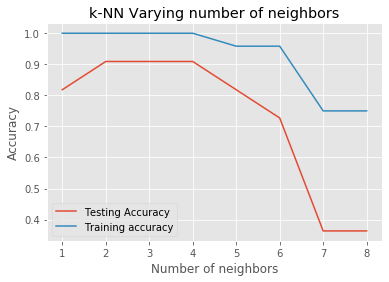

In [29]:

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_acc, label='Testing Accuracy')
plt.plot(neighbors, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Fitting the Training Data

In [30]:

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_tf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Prediction

In [31]:
predictions=knn.predict(x_test_tf)
print(predictions)

[1 2 2 1 2 2 0 2 1 0 1]


# Confusion Matrix

In [32]:
cm = confusion_matrix(y_test,predictions)
cm

array([[2, 0, 0],
       [0, 4, 1],
       [0, 0, 4]], dtype=int64)

# Plotting The Confusion Matrix

In [72]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

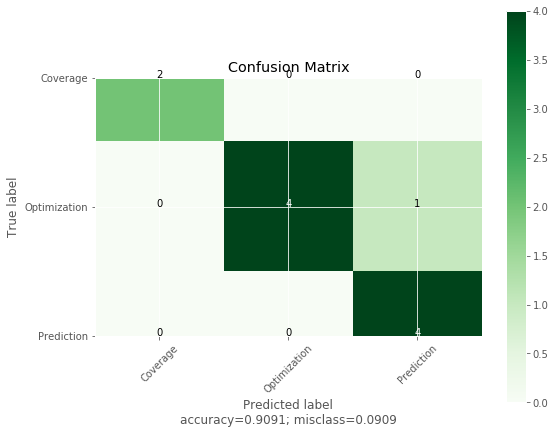

In [73]:
plot_confusion_matrix(cm           = np.array([[ 2,  0,   0],
                                              [  0,  4,  1],
                                              [  0,  0, 4]]), 
                      normalize    = False,
                      target_names = ['Coverage', 'Optimization', 'Prediction'],
                      title        = "Confusion Matrix")